Załadowanie bibliotek

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt

#Ustalenie stylu wykresów jako ggplot
#plt.style.use('ggplot')
from sklearn import preprocessing
from sklearn import tree
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
import pydotplus
from IPython.display import Image  
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error

Wczytanie danych

In [2]:
def dataframe_size_formated(dataframe, extra=""):
    print("Rozmiar danych{}: ".format(extra), dataframe.shape)     

# Ustalenie ścieżki do datasetu
filename_forestfires = './forestfires.csv'

# Wczytanie datasetu jako dataframe
forestfires_dataframe = pd.read_csv(filename_forestfires, sep=";")

# Wyświetlenie dataframe
display(forestfires_dataframe)


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
5,8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.00
6,8,6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.00
7,8,6,aug,mon,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.00
8,8,6,sep,tue,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.00
9,7,5,sep,sat,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.00


In [3]:
dataframe_size_formated(forestfires_dataframe)

Rozmiar danych:  (517, 13)


Zbiór danych ma 517 wierszy i 13 kolumn (ostatnia kolumna to atrybut decyzyjny, a pozostałe 12 kolumn to atrybuty warunkowe). W celu dalszego zbadania datasetu i weryfikacji typów danych kategorycznych w każdej kolumnie, wypisano unikalne wartości każdej kolumny. Sprawdzono również, czy zbiór danych zawiera brakujące wartości lub niepotrzebne kolumny.

In [4]:
def attributes_count(dataframe):
    print("Liczba różnych wartości atrybutów dla każdej kolumny:")
    for x in dataframe.columns:
        uniq = dataframe[x].unique()
        print("{:>8}: {:>2}".format(x, uniq.shape[0]))
        
attributes_count(forestfires_dataframe)


Liczba różnych wartości atrybutów dla każdej kolumny:
       X:  9
       Y:  7
   month: 12
     day:  7
    FFMC: 106
     DMC: 215
      DC: 219
     ISI: 119
    temp: 192
      RH: 75
    wind: 21
    rain:  7
    area: 251


Zauważono, że spośród 12 atrybutów warunkowych, 4 z nich mają liczbę klas mniejeszą niż 10. Równiż atrybut month nie charakteryzuje się dużą liczbą klas. Z uwagi na chęć wyeliminowania zalezności modelu od położenia, dnia tygodnia i opadów deszczu, podjęto decyzję o usunięciu kolumn o liczbie klas mniejszej równej 10, w tym celu utworzono poniższą funkcję. 

Wartości atrybutu month przekształcono w następujący sposób: 'jan'=1, 'feb'=2, ..., 'dec'=12.

In [5]:
def del_with_classes_no_less_than(dataframe, less):
    for col in dataframe.columns.values:
        col_unique = dataframe[col].unique()
        if len(col_unique) <= less:
            print("Usunięto kolumnę '{}',która zawiera liczbę klas mnieszą równą {}: {}".format(col, less, col_unique))
            dataframe = dataframe.drop(col, 1)
    return dataframe

In [6]:
dataframe_size_formated(forestfires_dataframe, " przed usunięciem atrybutów")
forestfires_dataframe = del_with_classes_no_less_than(forestfires_dataframe, 10)
dataframe_size_formated(forestfires_dataframe, " po usunięciu atrybutów")

forestfires_dataframe.month = forestfires_dataframe.month.map({
    'jan': 1,
    'feb': 2,
    'mar': 3,
    'apr': 4,
    'may': 5,
    'jun': 6,
    'jul': 7,
    'aug': 8,
    'sep': 9,
    'oct': 10,
    'nov': 11,
    'dec': 12,
})


Rozmiar danych przed usunięciem atrybutów:  (517, 13)
Usunięto kolumnę 'X',która zawiera liczbę klas mnieszą równą 10: [7 8 6 5 4 2 9 1 3]
Usunięto kolumnę 'Y',która zawiera liczbę klas mnieszą równą 10: [5 4 6 3 2 9 8]
Usunięto kolumnę 'day',która zawiera liczbę klas mnieszą równą 10: ['fri' 'tue' 'sat' 'sun' 'mon' 'wed' 'thu']
Usunięto kolumnę 'rain',która zawiera liczbę klas mnieszą równą 10: [ 0.   0.2  1.   6.4  0.8  0.4  1.4]
Rozmiar danych po usunięciu atrybutów:  (517, 9)


In [7]:
attributes_count(forestfires_dataframe)

Liczba różnych wartości atrybutów dla każdej kolumny:
   month: 12
    FFMC: 106
     DMC: 215
      DC: 219
     ISI: 119
    temp: 192
      RH: 75
    wind: 21
    area: 251


Z uwagi na brak danych kategorycznych w oczyszczonym zbiorze, kodowanie wartości atrybutów (kolumn) nie jest konieczne. Dokonać podziału danych na atrybuty warunkowe (zmienna X) i decyzyjne (zmienna Y).

In [8]:
X = forestfires_dataframe.drop(['area'], axis=1)
Y = forestfires_dataframe['area']

Kolejnym podziałem, który należy wykonać, jest podział danych na część treningową i testową. Założono, że rozmiar części testowej będzie wynosił 33% wszystkich danych. W celu zachowania powtarzalności wyników parametr random_state ustawiono na wartość 34 (ustawienie innej wartości bedzie powodowało wygenerowanie innego podziału danych i innego drzewa decyzyjnego).

In [9]:
random_state = 34

X_train, X_test ,Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state=random_state)

W oparciu o dane zbudowano drzewo decyzyjne. Do tego celu utworzno specjalną funkcję.

In [10]:
def build_tree(X, X_train, X_test, Y_train, Y_test, random_state, **kwargs):
    regr = tree.DecisionTreeRegressor(random_state=random_state, **kwargs)
    regr = regr.fit(X_train, Y_train)

    dot_data = tree.export_graphviz(regr, out_file=None,  
                                    feature_names=X.columns, 
                                    filled=True, rounded=True,  
                                    special_characters=True)  
    graph = pydotplus.graph_from_dot_data(dot_data)  
    display(Image(graph.create_png()))
        
    return regr

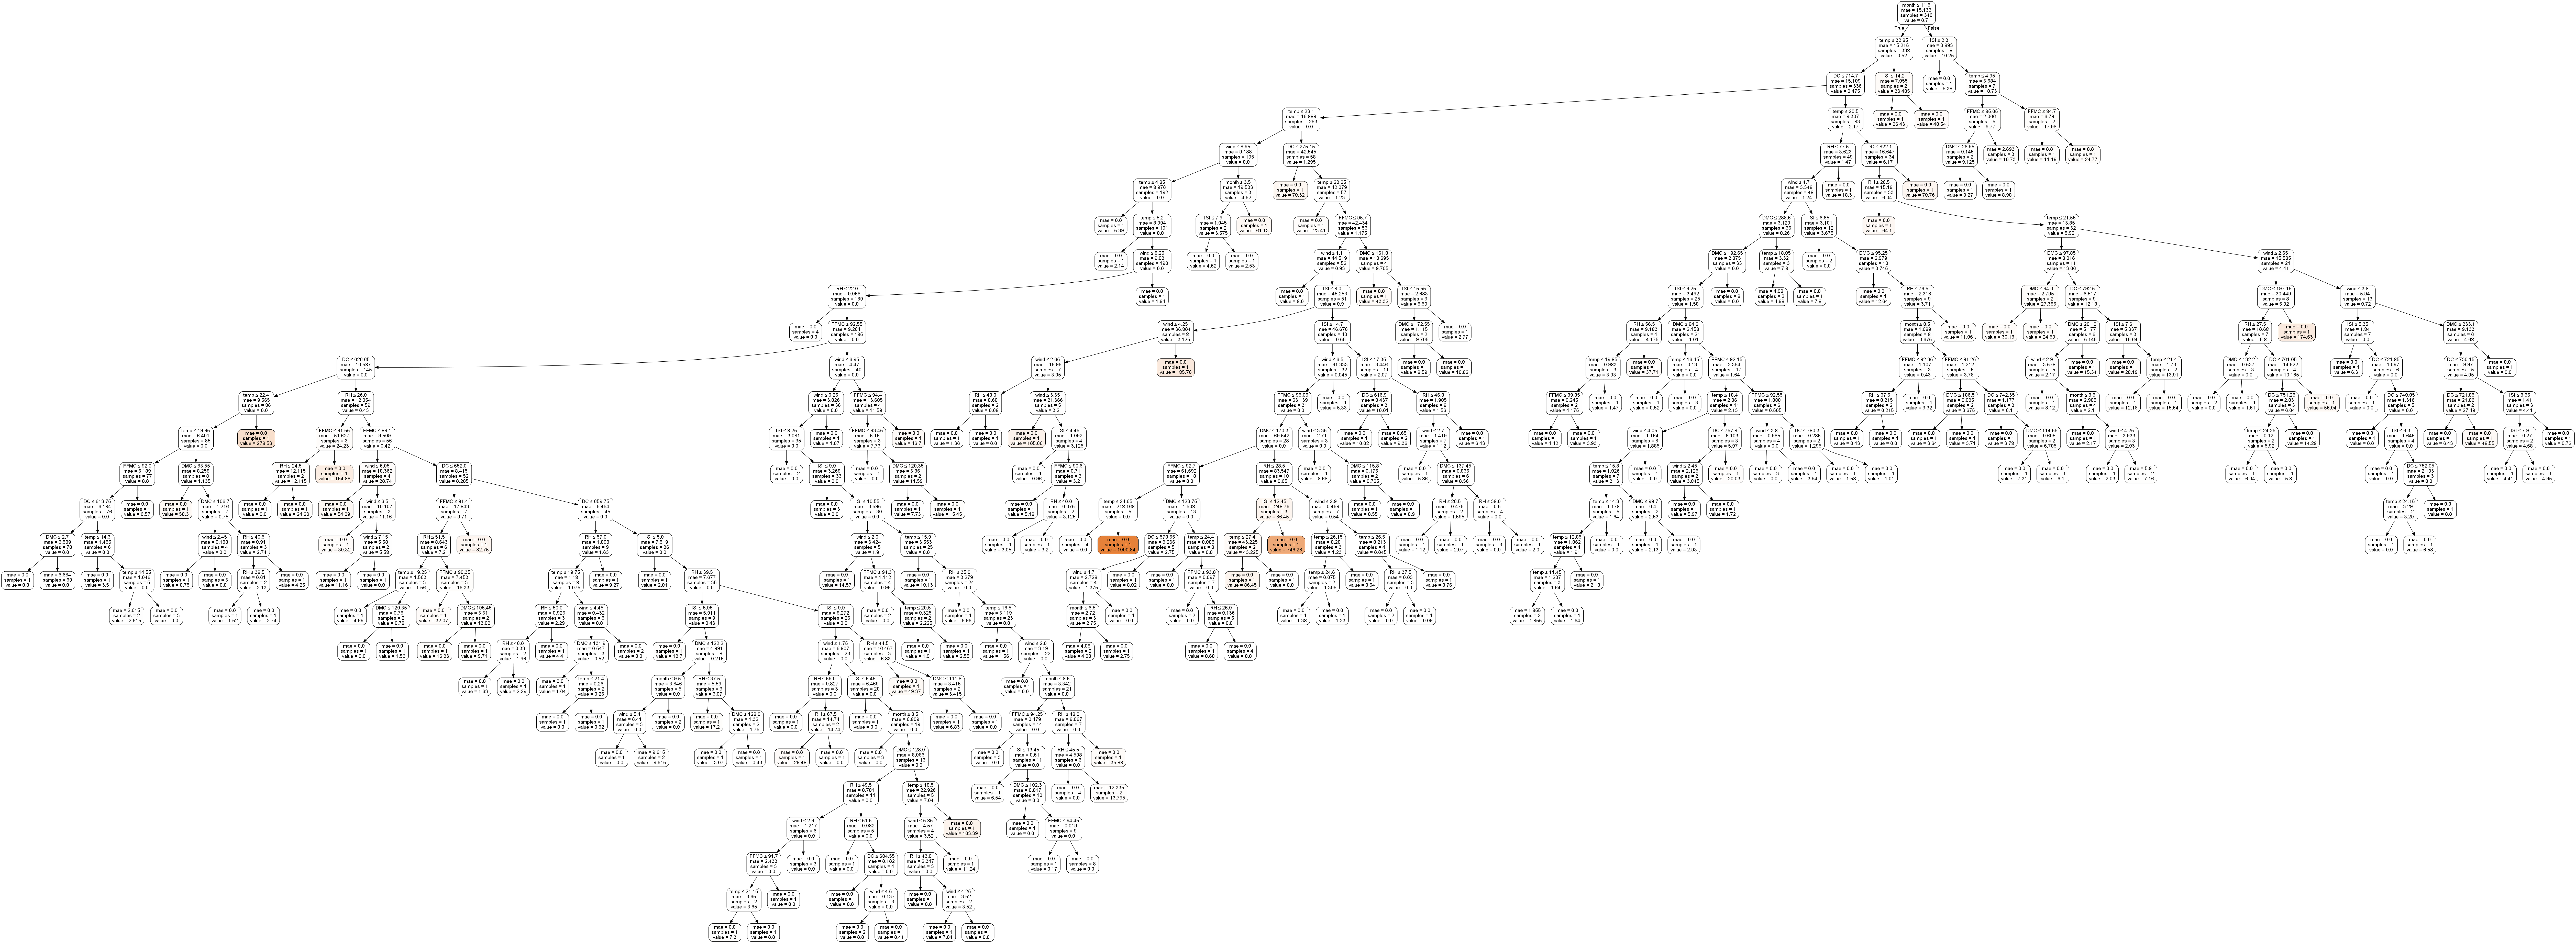

In [11]:
regr = build_tree(X, X_train, X_test, Y_train, Y_test, random_state, max_depth=None, criterion='mae')

Drzewo wygenerowane bez przycinania oraz innych optymalizacji jest zbyt duże.

In [12]:
def check_tree_mae(regr, X_train, X_test, Y_train, Y_test, print_score=True):
    preds=regr.predict(X_test)
    
    line_pred, = plt.plot(preds, label='Wartość przewidziana Y_test')
    line_real, = plt.plot(Y_test.values, label='Wartość rzeczywista Y_test')
    plt.legend(handles=[line_pred, line_real])
  
    mae = mean_absolute_error(Y_test, preds)
    if print_score:
        print('Mean absolute error: %.3f' % mae)
    return mae

def check_tree_cross_val_score(regr, X, Y, print_score=True):
    scores = cross_val_score(regr, X, Y, cv=3, scoring='neg_mean_squared_error')
    current_score = np.mean(np.sqrt(-scores))

    if print_score:
        print('Dokładność pomiędzy Y_pred oraz Y_test (neg_mean_squared_error): %.3f' % current_score)
    return current_score              


Metody mean absolute error (MAE) oraz mean squared error (MSE) zostały wykorzystane do określenia dokładności między Y_pred a Y_test. Im mniejsza wartość obydwu parametrów tym drzewo decyzyjne jest lepiej dopasowane do danych testowych. MAE jest miarą różnicy między dwiema zmiennymi ciągłymi. Z kolei MSE jest wartością oczekiwaną kwadratu „błędu”, czyli różnicy pomiędzy estymatorem i wartością estymowaną.

Mean absolute error: 24.524
Dokładność pomiędzy Y_pred oraz Y_test (neg_mean_squared_error): 108.680



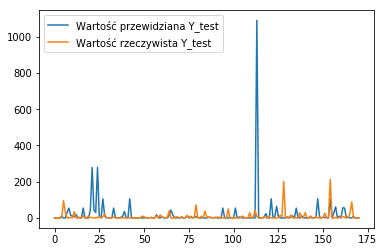

In [13]:
check_tree_mae(regr, X_train, X_test, Y_train, Y_test)
check_tree_cross_val_score(regr, X, Y)

print("")

Z wartości Mean absolute error widać, że błąd drzewa z maksymalnie 10 poziomami wynosi średnio około 24,5 hektara lasu na przewidywanie. Również bład MSE jest dość duży.

In [14]:
def attribute_importance(regr, X):
    attrs = X.columns.values
    attr_importance = regr.feature_importances_
    sorted_attr_importance = np.argsort(attr_importance)
    range_sorted_attr_importance = range(len(sorted_attr_importance))
    
    plt.figure(figsize=(8, 7))
    plt.barh(range_sorted_attr_importance, attr_importance[sorted_attr_importance], color='#33cc33')
    plt.yticks(range_sorted_attr_importance, attrs[sorted_attr_importance])
    plt.xlabel('Importance')
    plt.title('Attribute importances')
    plt.draw()
    plt.show()

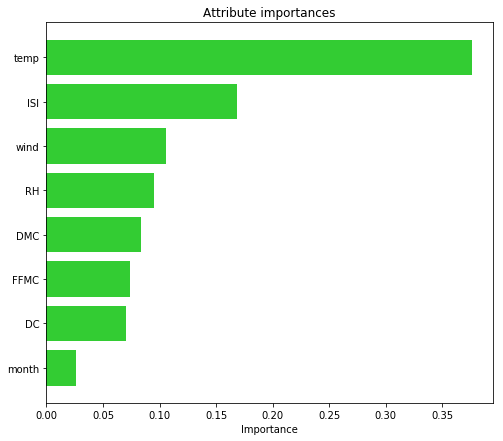

In [15]:
attribute_importance(regr, X)

Zauważono, że najważnijszymi atrybutami są: month oraz temp. Mniejsze znaczenie mają pozostałe atrybuty. Wygenerowane drzewo decyzyjne posiada głębokość powyżej 15, jest to zdecydowanie zbyt dużo. Optymalne drzewo przedstawiono poniżej.

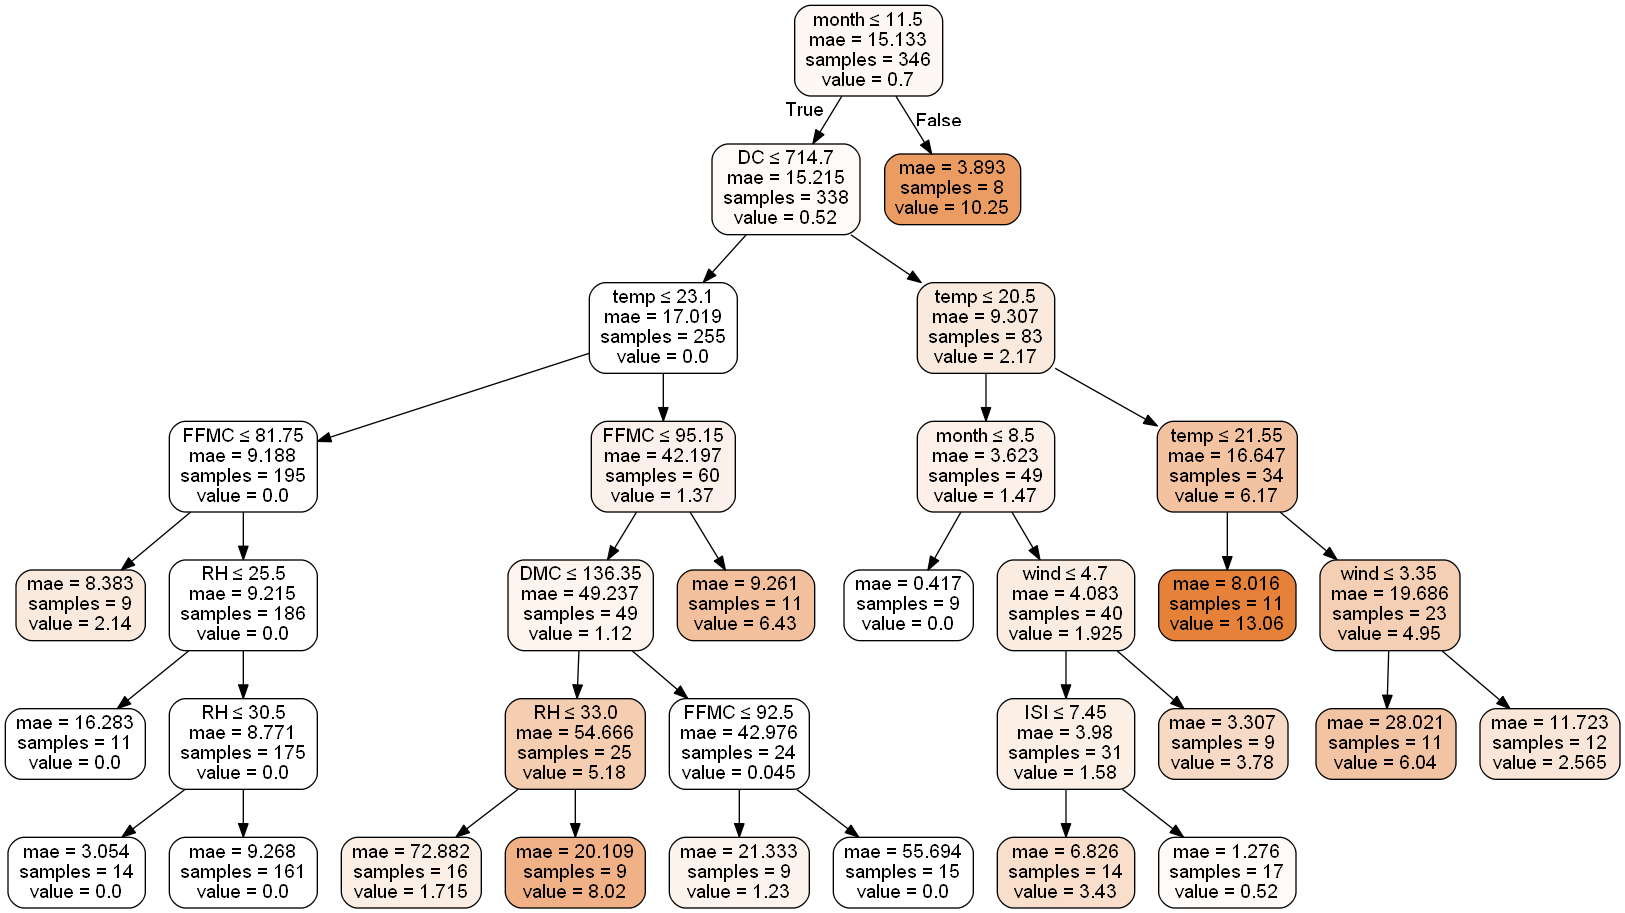

In [16]:
regr = build_tree(X, X_train, X_test, Y_train, Y_test, random_state, max_depth=6, min_samples_leaf = 8, criterion='mae')

Mean absolute error: 8.706
Dokładność pomiędzy Y_pred oraz Y_test (neg_mean_squared_error): 58.401



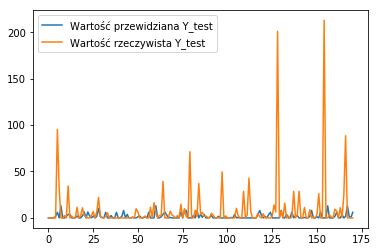

In [17]:
check_tree_mae(regr, X_train, X_test, Y_train, Y_test)
check_tree_cross_val_score(regr, X, Y)

print("")

Z wartości Mean absolute error widać, że błąd drzewa z maksymalnie 10 poziomami wynosi średnio około 8,7 hektara lasu na przewidywanie. Stwierdzono, że drzewo jest dość dobrze dopasowane do danych w porównaniu do poprzedniego drzewa.

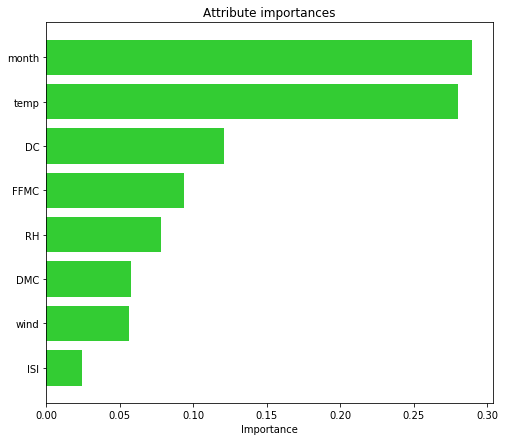

In [18]:
attribute_importance(regr, X)

Wygenerowane drzewo decyzyjne posiada głębokość wynoszącą 6 (drzewo bez ograniczenia wysokości głębokość powyżej 15). Zauważono, że najważnijszymi najważnijesze atrybuty nie zmieniły się w stosunku do poprzedniego drzewa.
